In [2]:
import os
import cv2
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET


In [9]:
# Define the paths to your image and annotation folders
path_image = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image"
path_annotations = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/annotation"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file in the image folder
for image_filename in os.listdir(path_image):
    if image_filename.lower().endswith(".jpg"):  # Check for image files
        image_path = os.path.join(path_image, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Resize the image to 224x224 if needed
            if image.shape[0] >= 224 and image.shape[1] >= 224:
                image = cv2.resize(image, (224, 224))
            else:
                print(f"Image dimensions are too small for resizing: {image_path}")

            # Load the corresponding label (XML file)
            xml_filename = os.path.splitext(image_filename)[0] + ".xml"
            xml_path = os.path.join(path_annotations, xml_filename)

            # Check if the XML file exists
            if os.path.exists(xml_path):
                # Parse the XML file to extract the label (you may need to adjust this based on your XML structure)
                tree = ET.parse(xml_path)
                root = tree.getroot()

                # Find the "name" element and check if it exists
                name_element = root.find("object/name")
                if name_element is not None:
                    label = name_element.text  # Use .text to get the text content of the element
                    labels.append(label)

                    # Append the image and label to the lists
                    images.append(image)

                else:
                    # Handle the case where the "name" element is missing
                    print(f"'name' element not found in XML file: {xml_path}")
            else:
                # Handle the case where the XML label file is missing
                print(f"XML label file not found for image: {image_path}")

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Now, check the shapes and class distribution
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (899, 224, 224, 3)
Labels shape: (899,)
Class: APAL, Count: 116
Class: Pseudodiploria, Count: 783


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (575, 224, 224, 3)
y_train shape: (575,)
X_valid shape: (144, 224, 224, 3)
y_valid shape: (144,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


In [5]:
# Save your data to a pickle file
with open('../data/external/data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

In [6]:
with open('../data/external/data.pkl','rb') as f:
    X_train,y_train,X_test,y_test, X_valid, y_valid = pickle.load(f)

In [7]:
# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (575, 224, 224, 3)
y_train shape: (575,)
X_valid shape: (144, 224, 224, 3)
y_valid shape: (144,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


## Loading without the .xml

In [16]:
import os
import cv2
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the path to your image folder
path_image = "../data/external/Coral_images/image"

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file in the image folder
for image_filename in os.listdir(path_image):
    if image_filename.lower().endswith((".jpg", ".JPG")):  # Check for image files with .jpg or .JPG extensions
        image_path = os.path.join(path_image, image_filename)

        # Load the image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Resize the image to 224x224 if needed
            if image.shape[0] >= 224 and image.shape[1] >= 224:
                image = cv2.resize(image, (224, 224))
            else:
                print(f"Image dimensions are too small for resizing: {image_path}")

            # Convert the image to RGB color space
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Extract the label from the image file name (excluding the numeric part)
            match = re.match(r"([A-Za-z]+)", os.path.splitext(image_filename)[0])
            if match:
                label = match.group(1)
                # Append the image and label to the lists
                images.append(image_rgb)
                labels.append(label)
            else:
                # Handle cases where there's no match for the label
                print(f"No alphabetic characters found in image file name: {image_filename}")

# Convert the lists to NumPy arrays
images2 = np.array(images)
labels2 = np.array(labels)

# Now, check the shapes and class distribution
print(f"Images shape: {images2.shape}")
print(f"Labels shape: {labels2.shape}")

# Check class distribution
unique_labels, class_counts = np.unique(labels2, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (899, 224, 224, 3)
Labels shape: (899,)
Class: APAL, Count: 117
Class: Pseudodiploria, Count: 782


In [17]:
unique_labels2 = np.unique(labels2)
print("Unique Labels in the original dataset:")
print(unique_labels2)


Unique Labels in the original dataset:
['APAL' 'Pseudodiploria']


In [18]:
# Filter images and labels for the "apal" class
apal_images = images2[labels2 == "APAL"]
apal_labels = labels2[labels2 == "APAL"]

# Check the shape of the filtered data
print(f"Filtered APAL Images shape: {apal_images.shape}")
print(f"Filtered APAL Labels shape: {apal_labels.shape}")


Filtered APAL Images shape: (117, 224, 224, 3)
Filtered APAL Labels shape: (117,)


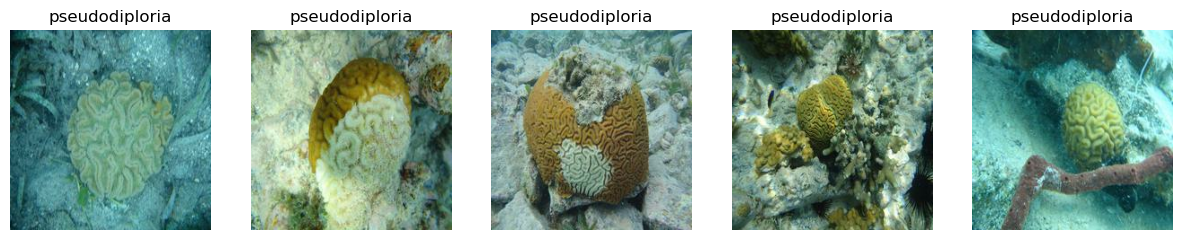

In [4]:
import matplotlib.pyplot as plt

# Define the number of samples to display
num_samples_to_display = 5

# Create subplots to display the images
plt.figure(figsize=(15, 5))

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images2[i])
    plt.title(labels2[i])
    plt.axis("off")

plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images2, labels2, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (575, 224, 224, 3)
y_train shape: (575,)
X_valid shape: (144, 224, 224, 3)
y_valid shape: (144,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


In [6]:
# Save your data to a pickle file
with open('../data/external/data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

In [7]:
with open('../data/external/data.pkl','rb') as f:
    X_train,y_train,X_test,y_test, X_valid, y_valid = pickle.load(f)
    
# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (575, 224, 224, 3)
y_train shape: (575,)
X_valid shape: (144, 224, 224, 3)
y_valid shape: (144,)
X_test shape: (180, 224, 224, 3)
y_test shape: (180,)


In [19]:
import pickle

# Define the filenames for the pickle files
images_pickle_file = 'images2.pickle'
labels_pickle_file = 'labels2.pickle'

# Save the 'images2' array to a pickle file
with open(images_pickle_file, 'wb') as file:
    pickle.dump(images2, file)

# Save the 'labels2' array to a pickle file
with open(labels_pickle_file, 'wb') as file:
    pickle.dump(labels2, file)

print(f'Images saved to {images_pickle_file}')
print(f'Labels saved to {labels_pickle_file}')


Images saved to images2.pickle
Labels saved to labels2.pickle
